Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# Display the first few rows of the dataset
print(df.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


Data Preprocessing

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Display the column names to identify the target variable
print(df.columns)

# Set the correct target column based on inspection
target_column = 'churn'  # Replace with the correct target column if different

# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: fill missing values with the mean or drop them)
# df = df.fillna(df.mean())  # Example of filling missing values


Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


Training the Model

In [19]:

# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Split the data into features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)


data classifier

In [20]:
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.789
Confusion Matrix:
[[1370  237]
 [ 185  208]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1607
           1       0.47      0.53      0.50       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000



Visualition

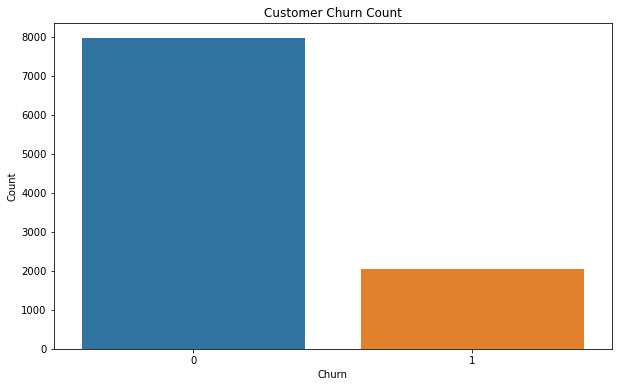

In [21]:
# Age Distribution
if 'Age' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'], kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

# Count plot for the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=target_column, data=df)
plt.title('Customer Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Count plot for 'Geography'
if 'Geography' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Geography', data=df)
    plt.title('Geography Distribution')
    plt.xlabel('Count')
    plt.ylabel('Geography')
    plt.show()

# Churn rate by geography
if 'Geography' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=target_column, y='Geography', data=df)
    plt.title('Churn Rate by Geography')
    plt.xlabel('Churn')
    plt.ylabel('Geography')
    plt.show()

# Age distribution by churn
if 'Age' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Age', hue=target_column, multiple='stack')
    plt.title('Age Distribution by Churn')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()